# Imports

In [1]:
# Basics 
import numpy as np
import sys
import pickle
import os

# plotting 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline 
from IPython.display import Image,display
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Scipy 
import scipy 
import scipy.stats
from scipy.optimize import minimize
from scipy.stats import truncnorm
from scipy.optimize import linprog
from scipy.io import loadmat

In [24]:
sys.path.append('../shared/')
sys.path.append('../plotting/')
from scenarios import setup_params, Agent
from plotting_twoD import plot_2D_arrows
from plotting_basics import plot_q_or_pi, embellish_plot
from scenarios import state2idcs
from matpy_conversions import convert_mat_s_to_python, convert_SI_function, convert_SIA_function

# Loading Data

In [25]:
# Load CVaR Value Iteration 
mat = loadmat('../simulation_results/2D_replay_example_random_policy.mat')

# Unpack 
Ny = mat['Y_set_all'].shape[1]
Ns = mat['Y_set_all'].shape[0] # could subtract one here 
Na = 4
gamma = mat['dis'][0][0]
y_set = mat['Y_set_all'][0,:]
Pol_CVaR = mat['Pol_CVaR']
P = mat['P']
r = mat['r']
print(P.shape)
print("x,x',a")

(28, 28, 4)
x,x',a


In [26]:
p,maze = setup_params(3) 
agent = Agent({'num_states':Ns-1,
               'num_actions':Na,
               'start_states':[4],'r_params':p['r_params']},maze)

In [27]:
agent

# Plotting (single y)

In [36]:
example_name='2D_replay_example'

## Alpha = 1

In [37]:
yi_pr = alpha_ind = 5
x_eval = 12
iters = 7
savename = '../simulation_results/'+example_name+'_prioritized_VI_nCVaR_ypr'+str(yi_pr)+'_xeval'+str(x_eval)+'_iters'+str(iters)+'.pkl'

with open(savename,'rb') as f:
    results = pickle.load(f)

Text(0.5, 0.61, 'start')

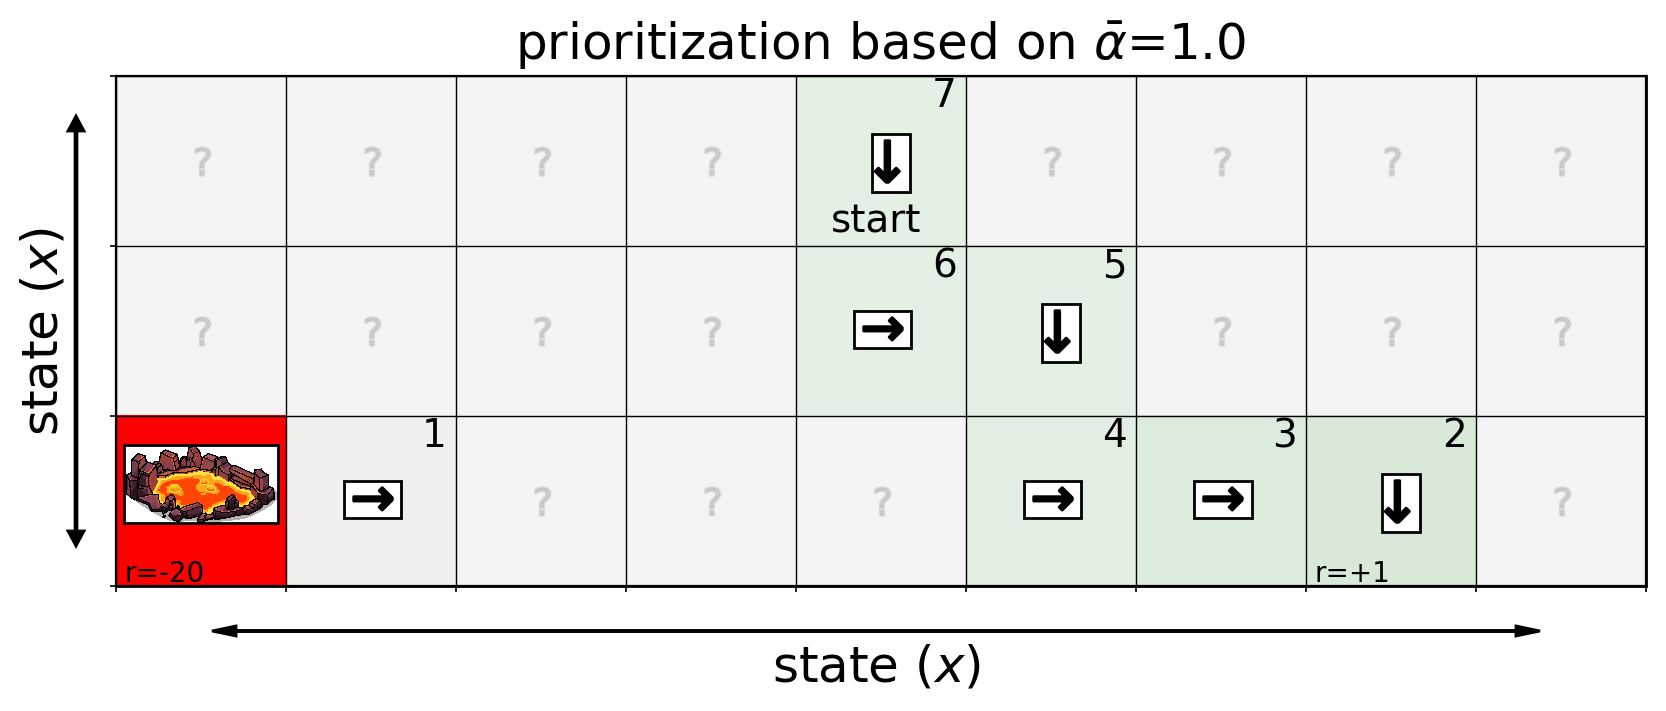

In [31]:
last_step = 7
fs = 18

y = np.round(results['y_set'][0],3)
x_eval_py = convert_mat_s_to_python(results['x_eval'],agent)
    

## Last Step ##

V_py = convert_SI_function(results['V_storage'][last_step-1,:,:],agent,neg_term_states=[])
Q_py = convert_SIA_function(results['Q_storage'][last_step-1,:,:,:],agent,neg_term_states=[])
Pol_py = convert_SIA_function(results['Pol_storage'][last_step-1,:,:,:],agent,neg_term_states=[])

# slice for risk threshold 
V_py = V_py[:,alpha_ind]
Pol_py = Pol_py[:,alpha_ind,:]

# Plot 
fig,ax = plt.subplots(1,1,figsize=(8,5),dpi=200)
term_states_for_plotting=[18]
Qrange = [-20,20]

for t in term_states_for_plotting:
    Pol_py[t,:]=0

# Value Underlay 
plot_q_or_pi(np.zeros_like(Pol_py),-1*V_py.reshape(agent.maze.shape),'',ax,agent.maze,q_or_pi='q',
            roundoff=1,inc_triangles=False,tri_add_labels=False,annot_value=False,Qrange=Qrange,
             term_states_for_plotting=term_states_for_plotting,n_colors=100)

# Policy as Arrows
plot_2D_arrows(Pol_py,alpha_ind,maze,question=True,
               term_states_for_plotting=term_states_for_plotting)

embellish_plot(ax,agent.maze,
    agent,None,
    cost=True,
    corner_labels=False,
    color_agent='b',
    center_rewards=False,
    r_fontsize=10,
    add_rewards=True,ec='white',fc='white',alpha=0.0,outer_lw=1,reward_color='k')

for step in range(last_step):
    
    # convert replayed states to python
    state_order_mat = np.arange(agent.num_states).reshape(maze.shape).flatten(order='F')
    replayed_state = state_order_mat[int(results['replay_storage'][step])]
    replayed_state_idx = state2idcs(replayed_state,maze)

    ax.text(replayed_state_idx[1]+0.3,
            replayed_state_idx[0]-0.32,str(int(step+1)),fontsize=fs-4,color='k')
  
alpha=y
# trans = ax.get_xaxis_transform() # x in data untis, y in axes fraction
# ann = ax.annotate(r'$\alpha$='+str(np.round(alpha,2)), xy=(-1.7,0.5), xycoords=trans,fontsize=14)

arr_img = mpimg.imread('../mscl/lava_pit.png')
imagebox = OffsetImage(arr_img , zoom=.014)
ab = AnnotationBbox(imagebox, (0, 2-.1),pad=0)
ax.add_artist(ab)

#plt.title(r'$\alpha$='+str(np.round(alpha,2)),fontsize=14)
plt.title(r'prioritization based on $\bar{\alpha}$='+str(np.round(alpha,2)),fontsize=fs)


# arrows
x0=0.1; y0=0.2
x1=0.9; y1=0.2
plt.arrow(x1,y1,x0-x1,y0-y1,transform=plt.gcf().transFigure,
         color='k',clip_on=False,head_width=.01)
plt.arrow(x0,y0,x1-x0,y1-y0,transform=plt.gcf().transFigure,
         color='k',clip_on=False,head_width=.01)
plt.text((x0+x1)/2,y0-0.05,r'state ($x$)',
             transform=plt.gcf().transFigure,clip_on=False,
             rotation=0,fontsize=fs,ha='center')

# arrows
x0=0.0; y0=0.3
x1=0.0; y1=0.7
plt.arrow(x1,y1,x0-x1,y0-y1,transform=plt.gcf().transFigure,
         color='k',clip_on=False,head_width=.01)
plt.arrow(x0,y0,x1-x0,y1-y0,transform=plt.gcf().transFigure,
         color='k',clip_on=False,head_width=.01)
plt.text(x0-0.02,(y0+y1)/2,r'state ($x$)',
             transform=plt.gcf().transFigure,clip_on=False,
             rotation=90,fontsize=fs,va='center',ha='center')


plt.text(0.5,0.61,'start',
     transform=plt.gcf().transFigure,clip_on=False,
     rotation=0,fontsize=fs-4,ha='center', va='center')


## Alpha = 0.10

In [38]:
yi_pr = alpha_ind = 2
x_eval = 12
iters = 7
savename = '../simulation_results/'+example_name+'_prioritized_VI_nCVaR_ypr'+str(yi_pr)+'_xeval'+str(x_eval)+'_iters'+str(iters)+'.pkl'

with open(savename,'rb') as f:
    results = pickle.load(f)

Text(0.5, 0.61, 'start')

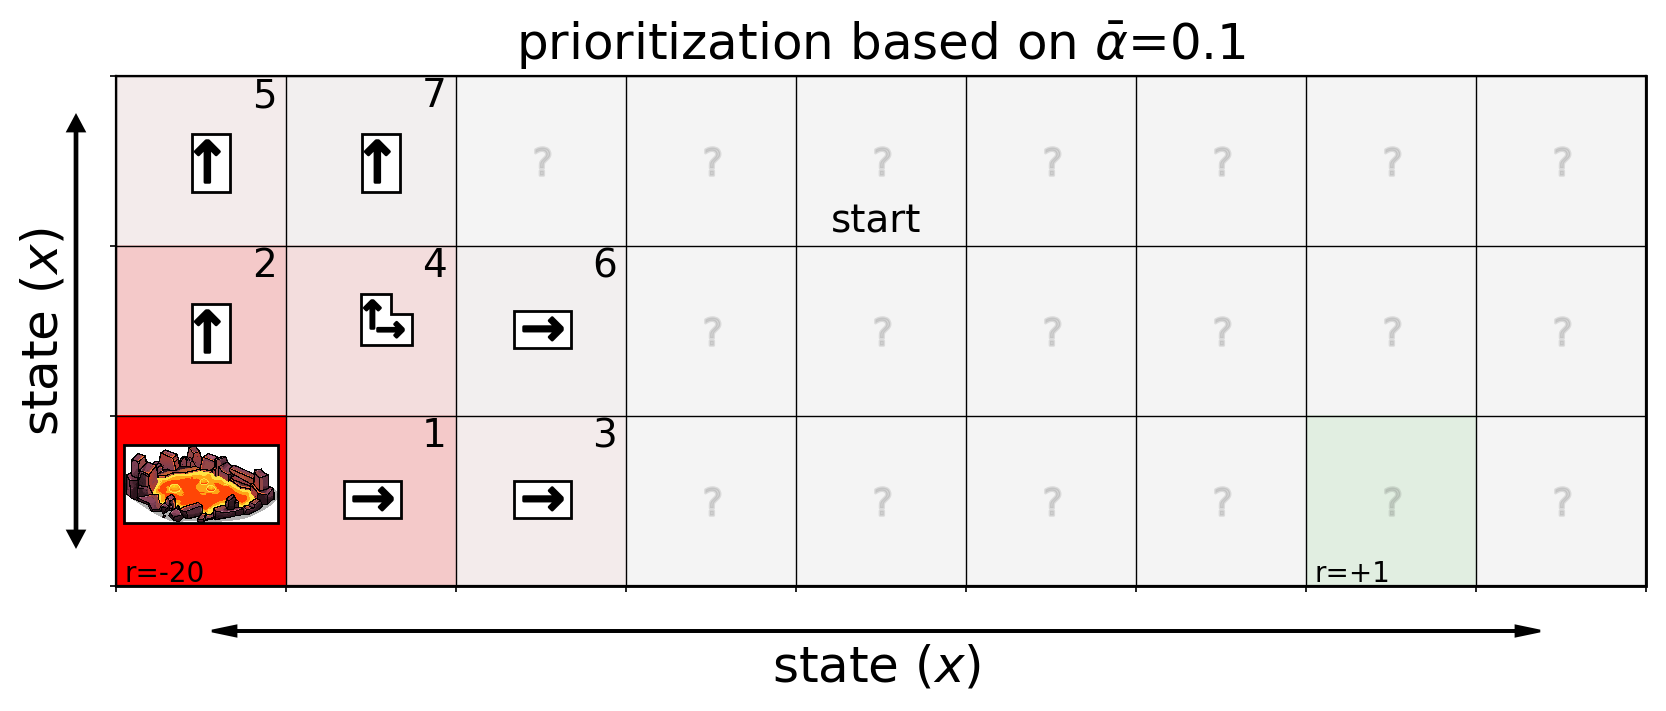

In [39]:
last_step = 7
fs = 18

y = np.round(results['y_set'][0],3)
x_eval_py = convert_mat_s_to_python(results['x_eval'],agent)
    

## Last Step ##

V_py = convert_SI_function(results['V_storage'][last_step-1,:,:],agent,neg_term_states=[])
Q_py = convert_SIA_function(results['Q_storage'][last_step-1,:,:,:],agent,neg_term_states=[])
Pol_py = convert_SIA_function(results['Pol_storage'][last_step-1,:,:,:],agent,neg_term_states=[])

# slice for risk threshold 
V_py = V_py[:,alpha_ind]
Pol_py = Pol_py[:,alpha_ind,:]

# Plot 
fig,ax = plt.subplots(1,1,figsize=(8,5),dpi=200)
term_states_for_plotting=[18]
Qrange = [-20,20]

for t in term_states_for_plotting:
    Pol_py[t,:]=0

# Value Underlay 
plot_q_or_pi(np.zeros_like(Pol_py),-1*V_py.reshape(agent.maze.shape),'',ax,agent.maze,q_or_pi='q',
            roundoff=1,inc_triangles=False,tri_add_labels=False,annot_value=False,Qrange=Qrange,
             term_states_for_plotting=term_states_for_plotting,n_colors=100)

# Policy as Arrows
plot_2D_arrows(Pol_py,alpha_ind,maze,question=True,
               term_states_for_plotting=term_states_for_plotting)

embellish_plot(ax,agent.maze,
    agent,None,
    cost=True,
    corner_labels=False,
    color_agent='b',
    center_rewards=False,
    r_fontsize=10,
    add_rewards=True,ec='white',fc='white',alpha=0.0,outer_lw=1,reward_color='k')

for step in range(last_step):
    
    # convert replayed states to python
    state_order_mat = np.arange(agent.num_states).reshape(maze.shape).flatten(order='F')
    replayed_state = state_order_mat[int(results['replay_storage'][step])]
    replayed_state_idx = state2idcs(replayed_state,maze)

    ax.text(replayed_state_idx[1]+0.3,
            replayed_state_idx[0]-0.32,str(int(step+1)),fontsize=fs-4,color='k')
  
alpha=y
# trans = ax.get_xaxis_transform() # x in data untis, y in axes fraction
# ann = ax.annotate(r'$\alpha$='+str(np.round(alpha,2)), xy=(-1.7,0.5), xycoords=trans,fontsize=14)

arr_img = mpimg.imread('../mscl/lava_pit.png')
imagebox = OffsetImage(arr_img , zoom=.014)
ab = AnnotationBbox(imagebox, (0, 2-.1),pad=0)
ax.add_artist(ab)

#plt.title(r'$\alpha$='+str(np.round(alpha,2)),fontsize=14)
plt.title(r'prioritization based on $\bar{\alpha}$='+str(np.round(alpha,2)),fontsize=fs)



# arrows
x0=0.1; y0=0.2
x1=0.9; y1=0.2
plt.arrow(x1,y1,x0-x1,y0-y1,transform=plt.gcf().transFigure,
         color='k',clip_on=False,head_width=.01)
plt.arrow(x0,y0,x1-x0,y1-y0,transform=plt.gcf().transFigure,
         color='k',clip_on=False,head_width=.01)
plt.text((x0+x1)/2,y0-0.05,r'state ($x$)',
             transform=plt.gcf().transFigure,clip_on=False,
             rotation=0,fontsize=fs,ha='center')

# arrows
x0=0.0; y0=0.3
x1=0.0; y1=0.7
plt.arrow(x1,y1,x0-x1,y0-y1,transform=plt.gcf().transFigure,
         color='k',clip_on=False,head_width=.01)
plt.arrow(x0,y0,x1-x0,y1-y0,transform=plt.gcf().transFigure,
         color='k',clip_on=False,head_width=.01)
plt.text(x0-0.02,(y0+y1)/2,r'state ($x$)',
             transform=plt.gcf().transFigure,clip_on=False,
             rotation=90,fontsize=fs,va='center',ha='center')


plt.text(0.5,0.61,'start',
     transform=plt.gcf().transFigure,clip_on=False,
     rotation=0,fontsize=fs-4,ha='center', va='center')